In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [4]:
import warnings
warnings.filterwarnings('ignore', lineno=590)

# #1

### a.)

In [5]:
df = pd.read_csv('uscrime.csv')
df.head()

,R,Age,Ed,Ex0,Ex1,LF,M,N,U1,U2,W,X
0,79.1,151,91,58,56,510,950,33,108,41,394,261
1,163.5,143,113,103,95,583,1012,13,96,36,557,194
2,57.8,142,89,45,44,533,969,18,94,33,318,250
3,196.9,136,121,149,141,577,994,157,102,39,673,167
4,123.4,141,121,109,101,591,985,18,91,20,578,174


### b.)

In [6]:
#NORMALIZE

dfnorm = df.copy()
dfnorm.ix[:,:12] = skp.scale(
    df.ix[:,:12].astype(np.float))
dfnorm.describe().ix[['mean','std']]

,R,Age,Ed,Ex0,Ex1,LF,M,N,U1,U2,W,X
mean,2.102337e-16,-4.629866e-16,-4.866084e-16,-1.535415e-17,1.251954e-16,4.251918e-16,5.007814e-16,1.417306e-17,3.850348e-16,-2.598394e-17,3.425156e-16,-9.448707e-18
std,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00


### b.)

In [18]:
#b-1.)
# Create a PCA model
pca_model = skd.PCA().fit(dfnorm.ix[:,:12])

pca_model.components_.shape

(12, 12)

In [19]:
# Look at the variances explained by each component.
# These values equal to the eigenvalues of the correlation matrix.
pca_model.explained_variance_

array([ 4.96973481,  2.33180137,  1.83004456,  1.21307784,  0.60383795,
        0.31920199,  0.2449876 ,  0.22096815,  0.12832731,  0.07693884,
        0.0559042 ,  0.00517538])

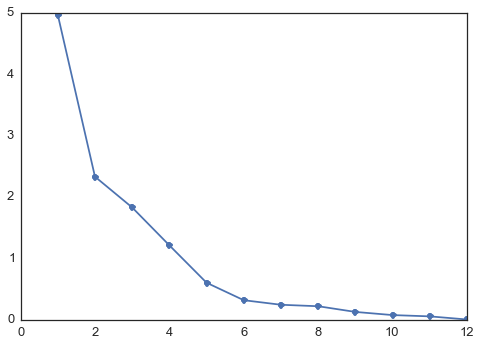

In [22]:
# A "scree" plot.
plt.plot(range(1,13), pca_model.explained_variance_, 'b-o')

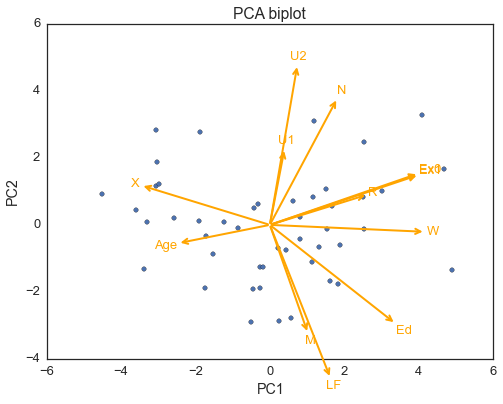

In [24]:
# Scatterplot of disaggregated data
X = pca_model.transform(dfnorm.ix[:,:12])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-4, 6)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(dfnorm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

### ISOMAP

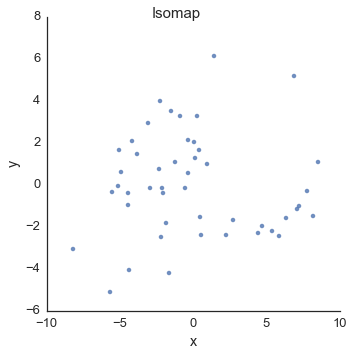

In [38]:
# Isomap
X = skm.Isomap().fit_transform(dfnorm.ix[:,:12])
df_X = pd.DataFrame(X, columns=['x','y'])
g = sns.lmplot(x='x',y='y', data=df_X, 
                fit_reg=False)
g.fig.suptitle('Isomap', fontsize=15)

### MD5

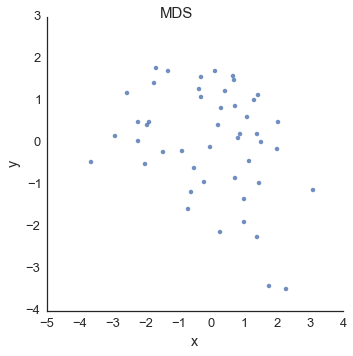

In [161]:
# MDS
X = skm.MDS().fit_transform(dfnorm.ix[:,:4])
df_X = pd.DataFrame(X, columns=['x','y'])
g = sns.lmplot(x='x',y='y', data=df_X, 
                fit_reg=False)
g.fig.suptitle('MDS', fontsize=15)

### T-SNE

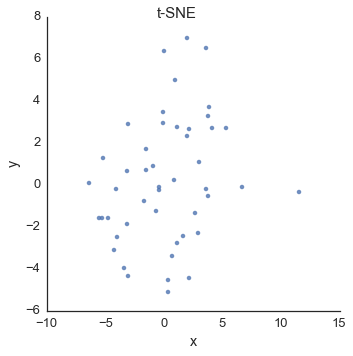

In [162]:
# t-SNE
X = skm.TSNE(learning_rate=100).fit_transform(dfnorm.ix[:,:4])
df_X = pd.DataFrame(X, columns=['x','y'])
g = sns.lmplot(x='x',y='y', data=df_X, 
                fit_reg=False)
g.fig.suptitle('t-SNE', fontsize=15)

# c.)

c-1

12 Principle Components


c-2

In [39]:
# Look at the variances explained by each component.
# These values equal to the eigenvalues of the correlation matrix.
pca_model.explained_variance_

array([ 4.96973481,  2.33180137,  1.83004456,  1.21307784,  0.60383795,
        0.31920199,  0.2449876 ,  0.22096815,  0.12832731,  0.07693884,
        0.0559042 ,  0.00517538])

c-3

In [163]:
yolo = (pca_model.explained_variance_ > 1).sum()
yolo

4

c-4

In [69]:
pca_model = skd.PCA(n_components=4).fit(dfnorm.ix[:,:12])

# Show the loadings
pd.DataFrame(pca_model.components_[:4,:].T, 
             index=dfnorm.columns,
             columns=['PC1', 'PC2', 'PC3', 'PC4'])

,PC1,PC2,PC3,PC4
R,0.266860,0.086739,-0.116822,0.646893
Age,-0.311629,-0.071419,-0.160223,0.439389
Ed,0.342421,-0.324221,0.109941,-0.102357
Ex0,0.403934,0.156912,-0.152719,0.157916
Ex1,0.404971,0.151668,-0.156180,0.129160
LF,0.152985,-0.489833,-0.002056,0.162141
M,0.097777,-0.355583,0.453042,0.390083
N,0.182596,0.391949,-0.288349,0.028383
U1,0.025708,0.241646,0.657893,0.025006
U2,0.057531,0.492167,0.416887,0.109818


# d.)

d-1

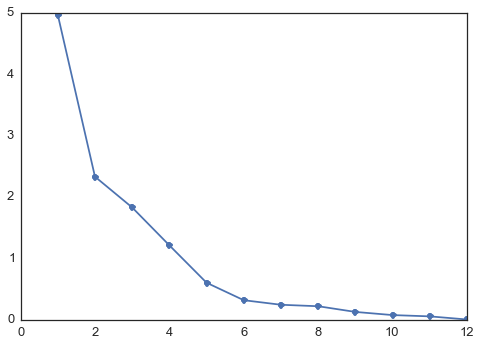

In [71]:
# A "scree" plot.
#b-1.)
# Create a PCA model
pca_model = skd.PCA().fit(dfnorm.ix[:,:12])
plt.plot(range(1,13), pca_model.explained_variance_, 'b-o')

Scree plots tell us the optimal number of clusters to have. Locate the elbow to retrieve the best number for k.

d-2

There are lots of factors/clusters involved in this dataset, but only 4-6 are principal components that are highly correlated/optimized.

# e.)

e-1

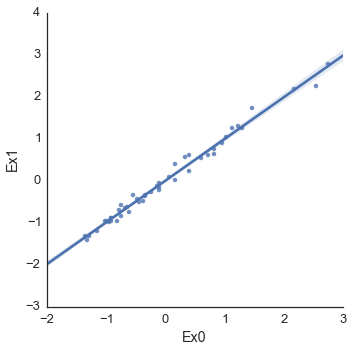

In [93]:
sns.lmplot(x='Ex0', y='Ex1', data=dfnorm);

In [92]:
from scipy.stats.stats import pearsonr
pearsonr(dfnorm.Ex0,dfnorm.Ex1)

(0.99358648319788678, 2.9995121250143015e-44)

There is an incredibly strong positive correlation between Ex0 and Ex1. These variables represent per capita police expenditures for two 1959 and 1960.

e-2

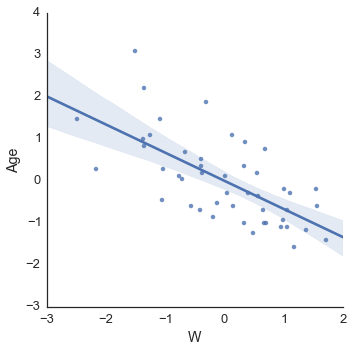

In [94]:
sns.lmplot(x='W', y='Age', data=dfnorm);

In [95]:
pearsonr(dfnorm.W,dfnorm.Age)

(-0.67005505578595215, 2.5851081034102942e-07)

There is a moderately strong negative correlation between medium assets/income and age.

# #2

### a.)

In [164]:
dfmanageit = pd.read_csv('manage.csv')
dfmanageit.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,SOME EXTENT,CONSIDERABLE EXTENT,SOME EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT
1,GREAT EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,GREAT EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT
2,CONSIDERABLE EXTENT,GREAT EXTENT,GREAT EXTENT,TO A VERY GREAT EXTENT,TO A VERY GREAT EXTENT,TO A VERY GREAT EXTENT,GREAT EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT
3,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT
4,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,CONSIDERABLE EXTENT,GREAT EXTENT,CONSIDERABLE EXTENT,MODERATE EXTENT,MODERATE EXTENT,MODERATE EXTENT,SOME EXTENT,MODERATE EXTENT,SOME EXTENT


### b.)

In [201]:
lookup_dict = {
    'VERY LITTLE EXTENT': 1,
    'LITTLE EXTENT': 2,
    'SOME EXTENT': 3,
    'MODERATE EXTENT': 4,
    'CONSIDERABLE EXTENT': 5,
    'GREAT EXTENT': 6,
    'TO A VERY GREAT EXTENT': 7
}

dfmanage = dfmanageit.copy()

for c in dfmanage.columns:
    dfmanage[c] = dfmanage[c].apply(lambda x: lookup_dict[x])
dfmanage.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11
0,5,5,4,4,4,3,5,3,5,4,5
1,6,4,5,6,5,6,5,6,6,6,5
2,5,6,6,7,7,7,6,6,5,5,6
3,5,5,5,5,5,4,4,4,5,5,5
4,5,5,5,6,5,4,4,4,3,4,3


In [202]:
#### Xin did an example. This is only saved for future reference. ps thnk you Xin!!!!!!!

dfmanage_copy_xin = dfmanageit.copy()
for rowIdx, row in dfmanageit.iterrows():
    for colIdx, elem in enumerate(row):
        dfmanage_copy_xin.ix[rowIdx,colIdx] = lookup_dict[elem]

### c.)

In [203]:
# build a 2-factor model
fa_model = skd.FactorAnalysis(n_components=1).fit(dfmanage)

# Show the loadings
pd.DataFrame(fa_model.components_[:1,:].T, 
             index=dfmanage.columns,
             columns=['Factor1'])

,Factor1
q1,0.496705
q2,0.690525
q3,0.619649
q4,0.652723
q5,0.568174
q6,0.800546
q7,0.851144
q8,0.683129
q9,0.591450
q10,0.675984


In [204]:
# build a 2-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(dfmanage)

# Show the loadings
pd.DataFrame(fa_model.components_[:2,:].T, 
             index=dfmanage.columns,
             columns=['Factor1', 'Factor2'])

,Factor1,Factor2
q1,0.482880,-0.385668
q2,0.700832,-0.449409
q3,0.608596,-0.337814
q4,0.638492,-0.353686
q5,0.600315,0.178145
q6,0.882545,0.563022
q7,0.898772,0.318227
q8,0.761418,0.550336
q9,0.540986,-0.112421
q10,0.644295,-0.098667


In [205]:
# build a 2-factor model
fa_model = skd.FactorAnalysis(n_components=3).fit(dfmanage)

# Show the loadings
cmon = pd.DataFrame(fa_model.components_[:3,:].T, 
             index=dfmanage.columns,
             columns=['Factor1', 'Factor2','Factor3'])

cmon

,Factor1,Factor2,Factor3
q1,0.520269,-0.322068,0.087115
q2,0.761505,-0.409129,-0.163937
q3,0.637311,-0.267673,-0.022856
q4,0.663764,-0.263731,-0.045500
q5,0.570236,0.241547,-0.250002
q6,0.809820,0.648087,-0.119632
q7,0.853406,0.418560,-0.245228
q8,0.692235,0.626117,-0.047060
q9,0.587515,-0.017452,0.613462
q10,0.671758,-0.012623,0.331820


### d.) EXTRA CREDIT

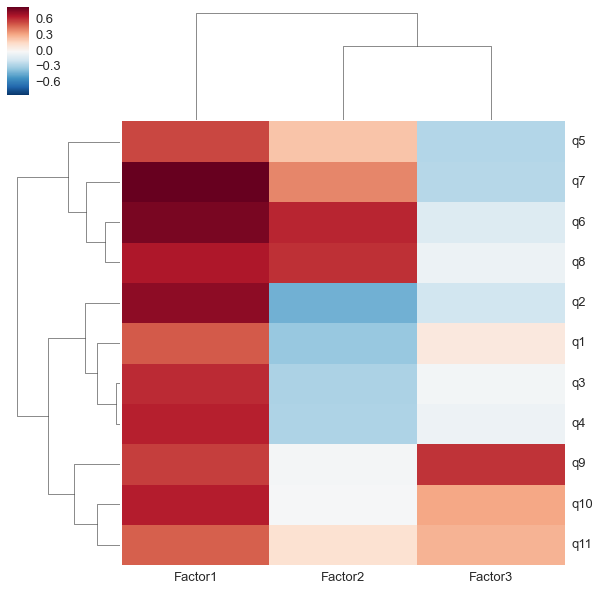

In [206]:
import seaborn as sns;
sns.clustermap(cmon)

### e.)

From the visualization, we can roughly identify the semantics of the factors:

•Factor 1: Overall good worker. Does well in nearly every category defined by each question

•Factor 2: Manage time efficiently. Set goals. Doesn't procrastinate.

•Factor 3: Detail oriented and cool under pressure. Skilled with understanding complex systems
